<a href="https://colab.research.google.com/github/soomin461/Kaggle_data_practice/blob/main/Kaggle_New_York_Taxi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Download kaggle Pakage
#!pip install kaggle

# Make Directory
!mkdir -p ~/.kaggle

# Kaggle.json upload
from google.colab import files
uploaded = files.upload()

#kaggle competitions {list, files, download, submit, submissions, leaderboard}
#kaggle datasets {list, files, download, create, version, init}
#kaggle kernels {list, init, push, pull, output, status}
#kaggle config {view, set, unset}

!cp kaggle.json ~/.kaggle
!chmod 600 /root/.kaggle/kaggle.json

Saving kaggle.json to kaggle (1).json


In [2]:
# download new-york taxi Dataset
!kaggle competitions download -c new-york-city-taxi-fare-prediction # forbidden error -> go to the homepage and agree

# unzip datasets
!unzip new-york-city-taxi-fare-prediction.zip

# unzip train.csv file
!unzip train.csv.zip

new-york-city-taxi-fare-prediction.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  new-york-city-taxi-fare-prediction.zip
replace GCP-Coupons-Instructions.rtf? [y]es, [n]o, [A]ll, [N]one, [r]ename: unzip:  cannot find or open train.csv.zip, train.csv.zip.zip or train.csv.zip.ZIP.


## File size

In [3]:
import os
def convert_bytes(file_path, unit=None):
  size = os.path.getsize(file_path)
  if unit ==  'KB':
    return print('FIle Size : ' +str(round(size/1024, 3))+ ' Kilobytes')
  elif unit == 'MB':
    return print('FIle Size : ' +str(round(size/(1024*1024), 3))+ ' Megabytes')
  elif unit == 'GB':
    return print('FIle Size : ' +str(round(size/(1024*1024*1024), 3))+ ' Gigabytes')
  else:
    return print('FIle Size : ' +str(size)+ ' bytes')

convert_bytes('train.csv')
convert_bytes('train.csv', 'GB')

FIle Size: 5697178298 bytes
FIle Size: 5.306 Gigabytes


In [13]:
file_list = [i for i in os.listdir() if i.split('.')[-1] == 'csv']
for file in file_list:
  print('The {} Size'.format(file))
  convert_bytes(file)
  convert_bytes(file, 'KB')
  convert_bytes(file, 'MB')
  convert_bytes(file, 'GB')
  print('-'*5)

The train.csv Size
FIle Size: 5697178298 bytes
FIle Size: 5563650.682 Kilobytes
FIle Size: 5433.253 Megabytes
FIle Size: 5.306 Gigabytes
-----
The test.csv Size
FIle Size: 983020 bytes
FIle Size: 959.98 Kilobytes
FIle Size: 0.937 Megabytes
FIle Size: 0.001 Gigabytes
-----
The sample_submission.csv Size
FIle Size: 343271 bytes
FIle Size: 335.226 Kilobytes
FIle Size: 0.327 Megabytes
FIle Size: 0.0 Gigabytes
-----


## Data Visulization

In [162]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

def skip_logic(index, skip_num):
  if index%skip_num==0:
    return False
  return True

train = pd.read_csv('./train.csv', nrows = 5000000) # skiprows= lambda x: skip_logic(x, 4), parse_dates=['pickup_datetime'])
test = pd.read_csv('./test.csv') # 4의 배수 False, 4의 배수 아님 -> True
submission = pd.read_csv('./sample_submission.csv')

In [163]:
# EDA
print(train.info())
print(test.info())

# 1   fare_amount        : 택시 요금
# 2   pickup_datetime    : 택시 승차 시 시간
# 3   pickup_longitude   : 택시 승차 시 경도
# 4   pickup_latitude    : 택시 승차 시 위도
# 5   dropoff_longitude  : 택시 하차 시 경도
# 6   dropoff_latitude   : 택시 하차 시 위도
# 7   passenger_count    : 택시 승객수
# Y_true : fare_amount


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000000 entries, 0 to 4999999
Data columns (total 8 columns):
 #   Column             Dtype  
---  ------             -----  
 0   key                object 
 1   fare_amount        float64
 2   pickup_datetime    object 
 3   pickup_longitude   float64
 4   pickup_latitude    float64
 5   dropoff_longitude  float64
 6   dropoff_latitude   float64
 7   passenger_count    int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 305.2+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9914 entries, 0 to 9913
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   key                9914 non-null   object 
 1   pickup_datetime    9914 non-null   object 
 2   pickup_longitude   9914 non-null   float64
 3   pickup_latitude    9914 non-null   float64
 4   dropoff_longitude  9914 non-null   float64
 5   dropoff_latitude   9914 non-null   float64
 6   pass

In [164]:
train.head(5)

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [165]:
train['fare_amount'].describe().reset_index().set_index('index').loc[['min', 'max']]

,fare_amount
index,
min,-100.00
max,1273.31


-  fare amount => Negative Value 
  - It is not easy to understand the meaning
  -  Delete negative fare amount value

In [166]:
print('Count(Fare amount < 0) :', train[train['fare_amount']<0]['fare_amount'].count())
print('Count(Fare amount >= 0) :', train[train['fare_amount']>=0]['fare_amount'].count())
Counter(train['fare_amount']<0)

Count(Fare amount < 0) : 211
Count(Fare amount >= 0) : 4999789


Counter({False: 4999789, True: 211})

In [167]:
train.drop(train[train['fare_amount']<0].index, axis=0, inplace=True)
Counter(train['fare_amount']<0)

Counter({False: 4999789})

In [168]:
train.reset_index(drop=True)
print(train['passenger_count'].unique()) 

[  1   2   3   6   5   4   0 208   9 129   7  51]


In [169]:
# passenger_count > 10? and 0? => outlier value -> delete
train = train.drop(train[train['passenger_count']>6].index, axis=0).reset_index(drop=True)
train = train.drop(train[train['passenger_count']==0].index, axis=0).reset_index(drop=True)
train['passenger_count'].unique()

array([1, 2, 3, 6, 5, 4])

In [170]:
train['passenger_count'].value_counts(normalize=True)
# 1 passenger proportion is almost 70%.

1    0.694258
2    0.148193
5    0.071032
3    0.044008
4    0.021278
6    0.021230
Name: passenger_count, dtype: float64

In [171]:
# Pakage Import

import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedShuffleSplit

sample = pd.DataFrame({'group' : np.repeat(['A', 'B', 'C'], (500, 300, 200)), 'Sample_value': np.random.randn(1000)})
#StratifiedShuffleSplit(n_split=)
split = StratifiedShuffleSplit(n_splits=2, test_size=0.5, random_state=2)
for train_index, test_index in split.split(sample, sample['group']):
  strata_train_set = sample.loc[train_index]
  test_set = sample.loc[test_index]

print(sample['group'].value_counts(normalize=True))
print(sample.shape)
print(strata_train_set['group'].value_counts(normalize=True))
print(strata_train_set.shape)


A    0.5
B    0.3
C    0.2
Name: group, dtype: float64
(1000, 2)
A    0.5
B    0.3
C    0.2
Name: group, dtype: float64
(500, 2)


In [172]:
train['passenger_count'].value_counts(normalize=True)

1    0.694258
2    0.148193
5    0.071032
3    0.044008
4    0.021278
6    0.021230
Name: passenger_count, dtype: float64

In [173]:
# sampling -> 5,000,000 * 0.005 = 25000 data sample
for train_index, sampling_index in StratifiedShuffleSplit(n_splits=1, test_size=0.005, random_state=42).split(train, train['passenger_count']):
    train_df = train.loc[train_index]
    sample_df = train.loc[sampling_index]
  
print(train_df.shape)
print(train_df['passenger_count'].value_counts(normalize=True))
print(sample_df.shape)
print(sample_df['passenger_count'].value_counts(normalize=True))


(4957228, 8)
1    0.694258
2    0.148193
5    0.071032
3    0.044008
4    0.021278
6    0.021230
Name: passenger_count, dtype: float64
(24911, 8)
1    0.694272
2    0.148208
5    0.071013
3    0.043997
4    0.021276
6    0.021236
Name: passenger_count, dtype: float64


In [174]:
sample_df.head()


,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
1360879,2011-02-09 09:23:00.000000261,4.5,2011-02-09 09:23:00 UTC,-73.962862,40.764158,-73.954005,40.766428,2
1168055,2010-08-17 07:42:41.0000002,5.7,2010-08-17 07:42:41 UTC,-73.993713,40.745535,-74.005702,40.740167,1
2421558,2010-05-06 02:01:47.0000006,18.9,2010-05-06 02:01:47 UTC,-73.990868,40.736738,-73.881371,40.752196,1
158163,2012-06-22 08:39:01.0000002,5.7,2012-06-22 08:39:01 UTC,-73.978875,40.762309,-73.981921,40.752303,1
2605171,2012-08-25 00:13:00.000000260,6.1,2012-08-25 00:13:00 UTC,-73.996755,40.737605,-73.982182,40.728067,1


(array([2.278e+04, 1.538e+03, 5.450e+02, 3.500e+01, 6.000e+00, 5.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 2.000e+00]),
 array([  0.   ,  22.222,  44.444,  66.666,  88.888, 111.11 , 133.332,
        155.554, 177.776, 199.998, 222.22 ]),
 <a list of 10 Patch objects>)

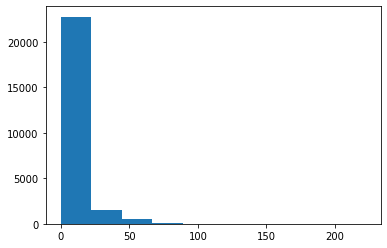

In [175]:
plt.hist(sample_df['fare_amount'])  # fare -> 

In [176]:
sample_temp = sample_df.copy()
sample_temp['cut'] = pd.cut(sample_df['fare_amount'], bins=[0, 20, 40, 60 ,80, 100])

# most case of fare is under 20$ (90%)
print(sample_temp['cut'].value_counts(normalize=True))
sample_temp.groupby(['cut'])['fare_amount'].count()


(0, 20]      0.897912
(20, 40]     0.074538
(40, 60]     0.025502
(60, 80]     0.001446
(80, 100]    0.000602
Name: cut, dtype: float64


cut
(0, 20]      22358
(20, 40]      1856
(40, 60]       635
(60, 80]        36
(80, 100]       15
Name: fare_amount, dtype: int64

In [177]:
# latitude (-90 ~ +90)
Counter(train['pickup_latitude'] < -90), Counter(train['pickup_latitude']>90)

(Counter({False: 4982113, True: 26}), Counter({False: 4982081, True: 58}))

In [178]:
# delete latitude outlier
train = train.drop(train[train['pickup_latitude']>90].index, axis=0).reset_index(drop=True)
train = train.drop(train[train['pickup_latitude']<-90].index, axis=0).reset_index(drop=True)
Counter(train['pickup_latitude'] < -90), Counter(train['pickup_latitude']>90)

(Counter({False: 4982055}), Counter({False: 4982055}))

In [180]:
# longitude (-180 ~ +180)
Counter(train['pickup_longitude'] < -180), Counter(train['pickup_longitude']>180)

(Counter({False: 4982006, True: 49}), Counter({False: 4982052, True: 3}))

In [181]:
# delete longitude outlier
train = train.drop(train[train['pickup_longitude']>180].index, axis=0).reset_index(drop=True)
train = train.drop(train[train['pickup_longitude']<-180].index, axis=0).reset_index(drop=True)
Counter(train['pickup_longitude'] < -180), Counter(train['pickup_longitude']>180)

(Counter({False: 4982003}), Counter({False: 4982003}))

In [188]:
train.iloc[:3, 0]

0     2009-06-15 17:26:21.0000001
1     2010-01-05 16:52:16.0000002
2    2011-08-18 00:35:00.00000049
Name: key, dtype: object

In [185]:
train.head(3)

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2


In [189]:
for train_index, sample_index in StratifiedShuffleSplit(n_splits=1, test_size=0.005, random_state=42).split(train, train['passenger_count']):
    train_df = train.loc[train_index]
    sample_df = train.loc[sample_index]
print(train_df.shape, sample_df.shape)

(4957092, 8) (24911, 8)


In [193]:
import ssl
from urllib.request import urlopen

context = ssl._create_unverified_context()
img_path1 = 'https://aiblog.nl/download/nyc_-74.5_-72.8_40.5_41.8.png'
map1 = urlopen(img_path1, context = context)
map1 = plt.imread(map1)

img_path2 = 'https://aiblog.nl/download/nyc_-74.3_-73.7_40.5_40.9.png'
map2 = urlopen(img_path2, context = context)
map2 = plt.imread(map2)



Text(0.5, 1.0, 'map2 zoom')

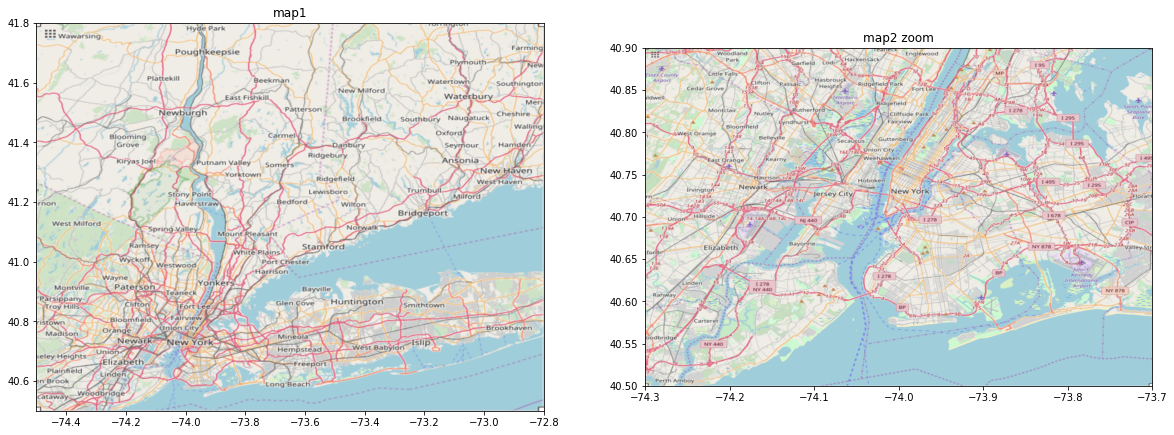

In [196]:
fig = plt.figure()
fig.set_size_inches(20, 10)

box1 = [-74.5, -72.8, 40.5, 41.8]
ax1 = fig.add_subplot(121)
ax1.imshow(map1, extent=box1)
ax1.set_title('map1')

box2 = [-74.3, -73.7, 40.5, 40.9]
ax2 = fig.add_subplot(122)
ax2.imshow(map2, extent=box2)
ax2.set_title('map2 zoom')

In [201]:
sample_df['pickup_datetime'] = pd.to_datetime(sample_df['pickup_datetime'])
sample_df['key'] = pd.to_datetime(sample_df['key'])

In [209]:
sample_df

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
612094,2012-11-05 17:54:00.000000102,4.5,2012-11-05 17:54:00+00:00,-73.981332,40.781253,-73.975010,40.789977,5
1183878,2009-02-23 18:06:12.000000500,8.5,2009-02-23 18:06:12+00:00,-74.005394,40.749912,-74.008355,40.721373,2
4523354,2011-11-12 14:23:16.000000100,6.9,2011-11-12 14:23:16+00:00,-73.983034,40.763313,-73.981473,40.780106,1
911568,2014-04-21 18:50:23.000000100,6.5,2014-04-21 18:50:23+00:00,-73.980554,40.764737,-73.997712,40.764718,1
3132588,2010-07-06 02:10:00.000000280,11.3,2010-07-06 02:10:00+00:00,-74.001893,40.726368,-73.994358,40.685553,1
...,...,...,...,...,...,...,...,...
4407782,2011-01-26 18:26:00.000000102,7.7,2011-01-26 18:26:00+00:00,-73.995193,40.725075,-73.979877,40.747847,1
2840209,2012-02-02 19:32:21.000000300,6.1,2012-02-02 19:32:21+00:00,-73.966415,40.764918,-73.979770,40.771112,1
3248288,2013-07-01 12:27:22.000000200,4.5,2013-07-01 12:27:22+00:00,-73.947025,40.744968,-73.947187,40.744920,1
2666410,2013-12-07 18:25:08.000000200,25.0,2013-12-07 18:25:08+00:00,-73.960348,40.776534,-74.014725,40.717003,1


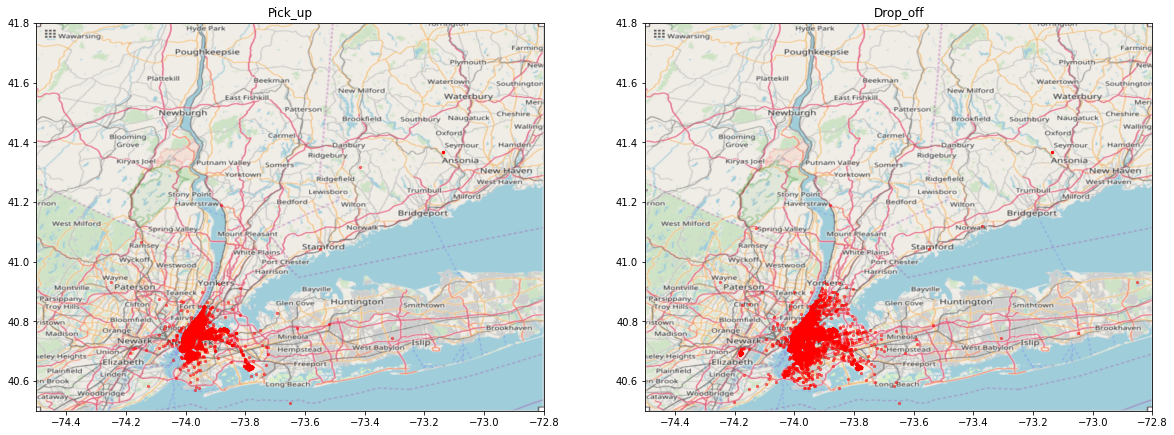

In [223]:
def make_map_scatter(df, box, map, s=5, alpha=0.5):
    fig = plt.figure()
    fig.set_size_inches(20, 10)

    # 1) scatter -> imshow
    ax1 = fig.add_subplot(121)
    ax1.set_title('Pick_up')
    ax1.scatter(df['pickup_longitude'], df['pickup_latitude'], s=s, alpha=alpha, c='r')
    ax1.imshow(map, extent=box)

    # 2) scatter -> imshow
    ax2 = fig.add_subplot(122)
    ax2.set_title('Drop_off')
    ax2.scatter(df['dropoff_longitude'], df['dropoff_latitude'], s=s, alpha=alpha, c='r')
    ax2.imshow(map, extent=box)

make_map_scatter(sample_df, box1, map1)

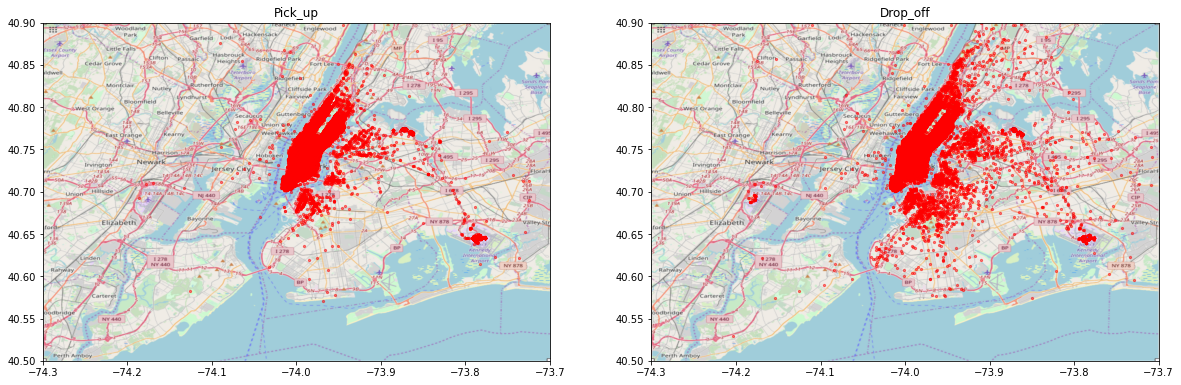

In [225]:
# zoom
make_map_scatter(sample_df, box2, map2)